<a href="https://colab.research.google.com/github/ozzxss/ozan-digits/blob/main/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving uploaded.jpg to uploaded.jpg


In [3]:
data = tf.keras.datasets.mnist
(training_images,training_labels),(val_images,val_labels) = data.load_data()
training_images = training_images/255
val_images = val_images/255
model = tf.keras.Sequential([layers.Flatten(input_shape=([28,28])),
                             layers.Dense(20, activation = 'relu'),
                             layers.Dense(10, activation = 'softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(training_images, training_labels, epochs=20)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6512 - accuracy: 0.8132
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2377 - accuracy: 0.9294
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1880 - accuracy: 0.9456
Epoch 4/20


dict_keys(['loss', 'accuracy'])


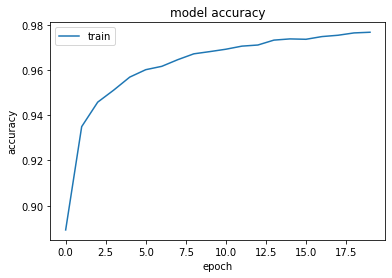

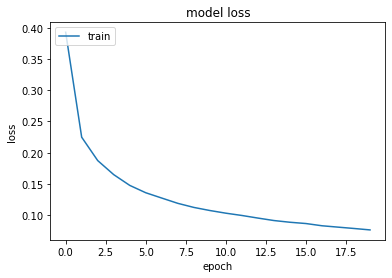

In [4]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(val_images,val_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9624


[0.13995279371738434, 0.9624000191688538]

In [25]:
classifications = model.predict(val_images)

In [26]:
print(classifications[1])

[5.3339360e-09 1.3224262e-06 9.9962115e-01 4.4215435e-06 5.5219482e-24
 3.6975453e-04 4.9458356e-07 5.8957717e-19 2.8014244e-06 1.7532134e-14]


In [27]:
print(val_labels[1])

2


In [28]:
from PIL import Image
img = Image.open("uploaded.jpg").convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)
test = model.predict(img[None,:,:])
print(test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
